# Setup

In [1]:
rm(list = ls())
options(scipen=999)
set.seed(10)

# Packages for Data Manipulation 
library("dplyr")
library('tidyverse')
library("data.table")

# Stuff for Graphs and Plots
library("ggplot2")
library("ggpubr")
library("gplots")
library("plotly")
library("ggrepel")
library("RColorBrewer")


##I define a personalized theme for ggplot based on a default theme
mytheme<-theme_minimal()+theme(plot.title = element_text(hjust = 0.5))

# General Tools for Regressions and Marginal Effects
library("car")
library("margins")

# Package for regression uplifting models
library("tools4uplift")

# Package for XGBoosting
library('xgboost')

# Package for HCF
library("grf")

# Miscellaneous
library("matrixStats")
library("reshape2")
library("Rcpp")
library('mltools')
library('glmnet')
library('caret')
library("mlr")


#Automatically Install Missing Packages
listOfPackages <- c("dplyr","tidyverse","data.table","ggplot2","ggpubr",
                    "gplots","plotly","ggrepel","RColorBrewer",
                    "reshape2","margins", "tools4uplift","xgboost","grf","ggplot2","matrixStats",
                    "Rcpp","car","mltools","glmnet",
                    "caret","mlr")
for (i in listOfPackages){
     if(! i %in% installed.packages()){
         install.packages(i, dependencies = TRUE)
         library(i)
     }
}



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tidyr' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()


Attaching package: 'data.table'


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

  

# Data Generation

In [2]:
# total number of users under study - Increased from 1000 to 100000 (experiment)
num_users <- 100000

u_id <- seq(1,num_users)

u_age <- sample(c(1,2,3,4,5,6),num_users,replace=T,prob=c(0.1,0.30,0.35,0.15,0.05,0.05))
# 1=<18 2=[18,25) 3=[25,35) 4=[35,45), 5=[45,55), 6=>55

u_gender <- sample(c(1,2),num_users,replace=T,prob=c(0.6,0.4))
# 1=M, 2=F

u_weekly_utilisation <- sample(0:7,num_users,replace=T)
# number of days using the service in a week

u_sub_utilisation <- round(runif(num_users,0,1),2)
# proportion of time spent on the service since the first subscription

#u_rating_given <- sample(0:5,num_users,replace=T)
u_rating_given<-round(runif(num_users,0,5),2)

# rating on a scale from 0 to 5 given by each user to the platform

u_format_pref <- sample(c(1,2,3),num_users,replace=T,prob=c(0.5,0.4,0.1))
# 1=TV-series, 2=movies, 3=documentaries

u_genre_pref <- sample(1:7,num_users,replace=T)
# 1=action, 2=comedy, 3=romance, 4=sci-fi, 5=animation, 6=drama, 7=horror

u_other_sub <- sample(0:1,num_users,replace=T)
# binary variable where 0=not subscribed to other streaming platforms, 1=yes

# creating the data table with all the users
USERS <- data.table(u_id, u_gender, u_age, u_weekly_utilisation, u_sub_utilisation, u_format_pref,
                    u_genre_pref, u_rating_given, u_other_sub)


In [3]:
USERS

u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,2,2,2,0.40,1,4,3.05,0
2,2,3,1,0.38,1,4,2.01,1
3,2,2,6,0.31,2,5,0.47,0
4,1,4,6,0.09,2,3,0.43,0
5,2,3,0,0.33,1,3,0.69,0
6,2,3,7,0.06,1,3,3.79,0
7,1,3,6,0.82,2,5,0.32,0
8,1,3,6,0.16,1,5,2.76,0
9,2,2,1,0.84,1,7,4.41,1


   
        1     2     3     4     5
  1  9850     0     0     0     0
  2     0 12037 11894  6068     0
  3     0 14243 13944  7039     0
  4     0  1465 10517  3005     0
  5     0   482  3511   940     0
  6     0     0  1470     0  3535

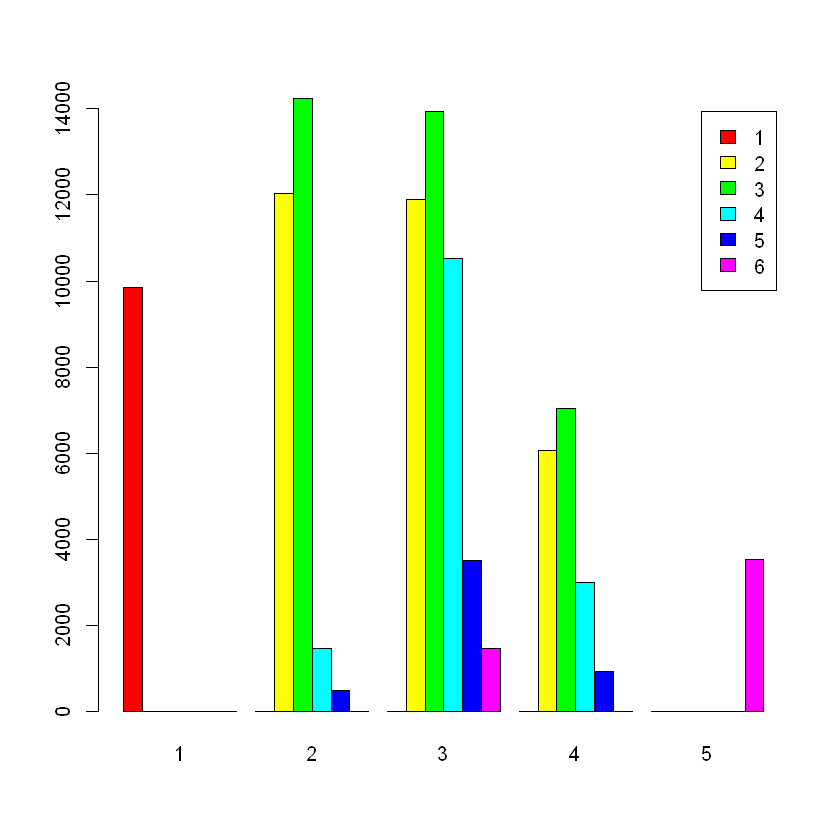

In [4]:
# defining the users' occupation variable based on some conditions
USERS$u_occupation[u_age==1] <- 1
USERS$u_occupation[u_age==2|u_age==3] <- sample(c(2,3,4),nrow(USERS[u_age==2|u_age==3]),replace=T,prob=c(0.4,0.4,0.2))
USERS$u_occupation[u_age==4|u_age==5] <- sample(c(2,3,4),nrow(USERS[u_age==4|u_age==5]),replace=T,prob=c(0.1,0.7,0.2))
USERS$u_occupation[u_age==6] <- sample(c(3,5),nrow(USERS[u_age==6]),replace=T,prob=c(0.3,0.7))
# occupation: 1=student 2=part-time 3=full-time 4=unemployed 5=retired
# age: 1=<18 2=[18,25) 3=[25,35) 4=[35,45), 5=[45,55), 6=>55

table(USERS$u_age, USERS$u_occupation)
barplot(table(USERS$u_age, USERS$u_occupation), beside=T, legend=T, col=rainbow(6))

In [5]:
# we suppose that our streaming service is focused on action and sci-fi tv-series 
# u_genre_pref(1=action||4=sci-fi), u_format_pref(1=series), u_age(-), u_occupation(-)
# u_other_sub(-), u_rating_given(+), u_sub_utilisation(+), u_weekly_utilisation(+)
# add error term from rnorm

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -107.5   389.1   618.5   619.3   849.8  1417.2 

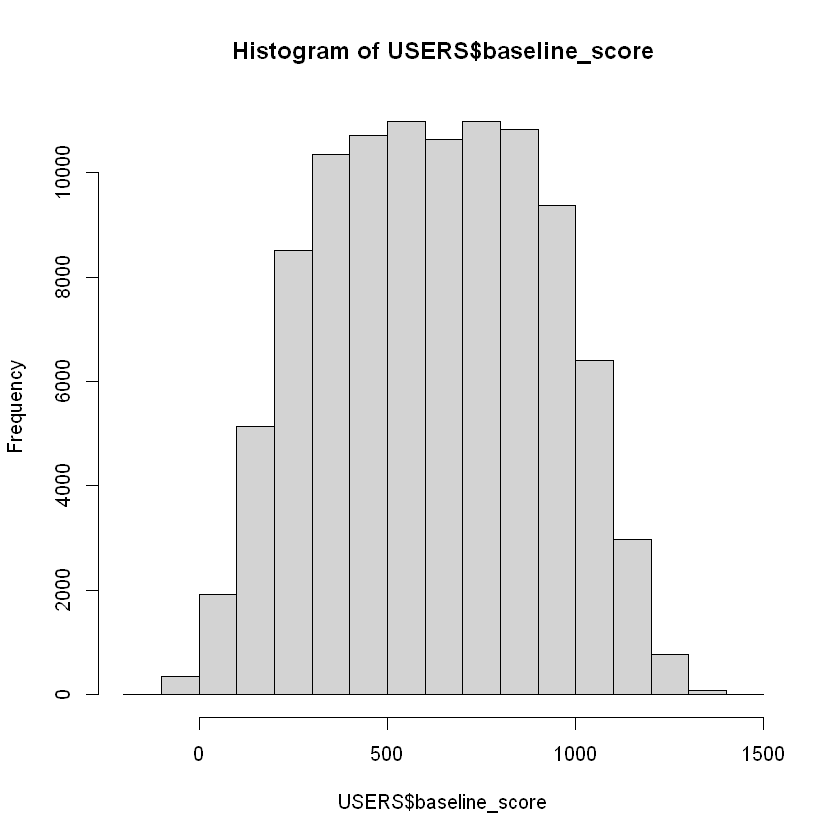

In [6]:
# score = u_genre_pref(1|4) 80 + u_format_pref(1) 100 + u_age(1|2) 30 - u_age(3|4|5|6) 30 
#         + u_occupation(1|4|5) 30 - u_occupation(2|3) 30 - u_other_sub*55 + u_rating_given*50
#         + u_sub_utilisation*130 + u_weekly_utilisation*115 + error 
# NB: coefficients arbitrarly given
# USERS[,score:=u_rating_given*50+u_sub_utilisation*130+u_weekly_utilisation*115-u_other_sub*55+rnorm(1)*100]

# Deterministic Portion of Utility
USERS[,baseline_score:=u_rating_given*50+u_sub_utilisation*130+u_weekly_utilisation*115-u_other_sub*55]
USERS[u_genre_pref==1|u_genre_pref==4, baseline_score:=baseline_score+80]
USERS[u_format_pref==1, baseline_score:=baseline_score+100]
USERS[,baseline_score:=ifelse(u_age==1|u_age==2,baseline_score+30,baseline_score-30)] 
USERS[,baseline_score:=ifelse(u_occupation==2|u_occupation==3,baseline_score-30,baseline_score+30)] 

summary(USERS$baseline_score)
hist(USERS$baseline_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -12.31  484.29  713.69  714.45  944.99 1512.39 

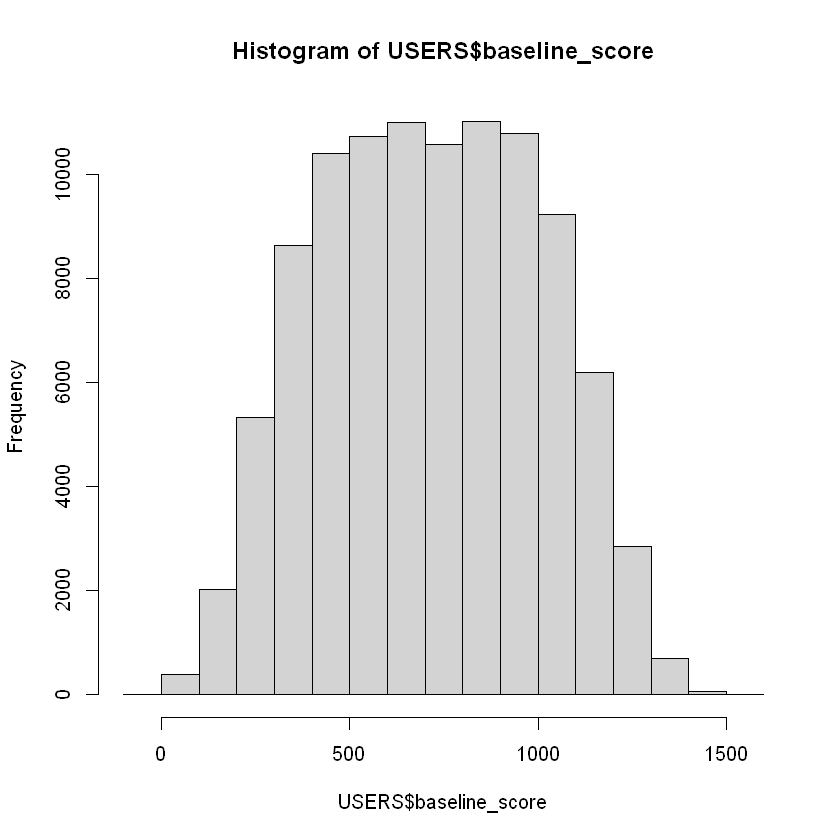

In [7]:
# Random Component of Utility (observable to customers but unobservable to the econometrician)
USERS$baseline_score=USERS$baseline_score+rnorm(1,0,70)

# NOTE: Remember to set appropriate size for the noise

summary(USERS$baseline_score)
hist(USERS$baseline_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.28    0.00    0.00   20.04   40.10  119.16 

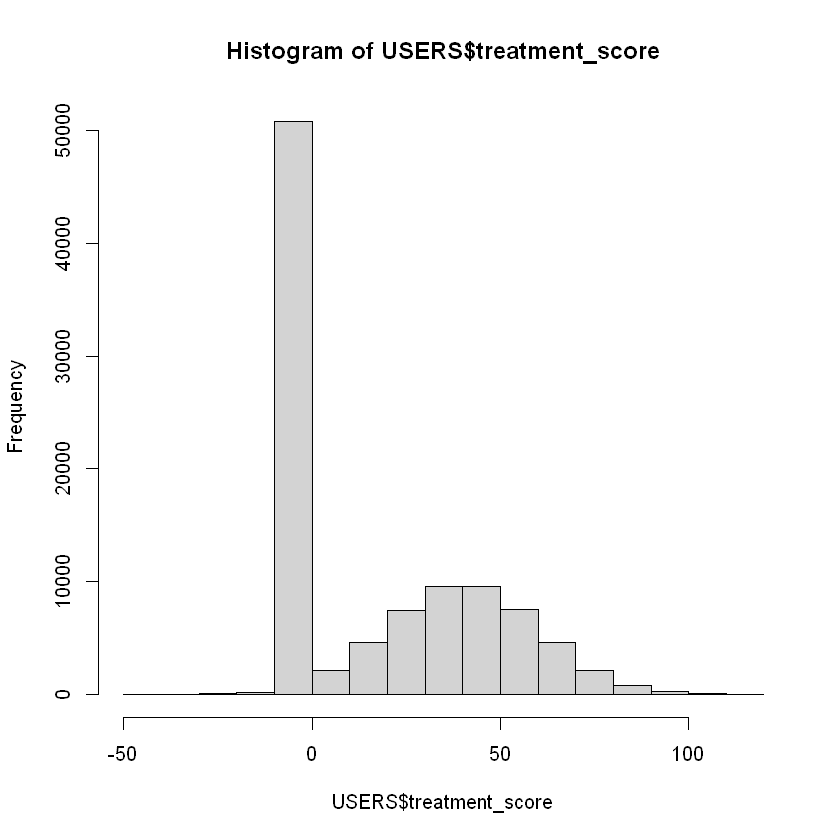

In [8]:
# Creating Treatment Effects

# treatment variable randomly assigned to the users
USERS$treated <- sample(0:1,num_users,replace=T)

# The impact of our policy can be divided into two components: 
# First: an additive component independent of covariates and positive on average
USERS[,treatment_score:=ifelse(treated==1,rnorm(num_users,40,20),0)]
summary(USERS$treatment_score)
hist(USERS$treatment_score)
# NOTE: Remember to set appropriate size for the random component


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -28.22    0.00    0.00   80.23  153.44  393.40 

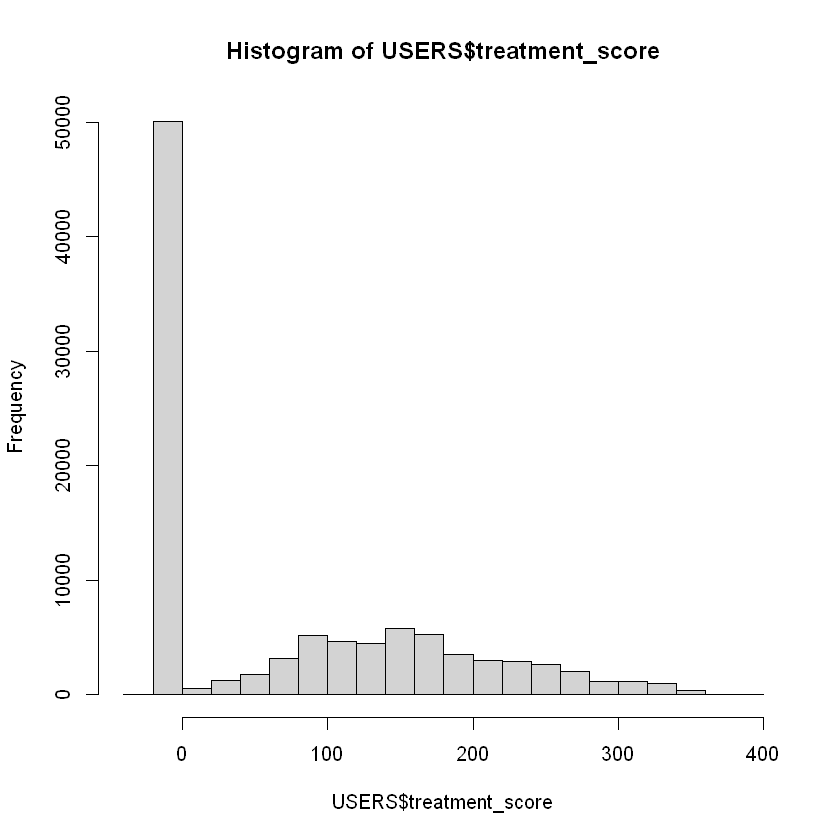

In [9]:
# Second: part of the effect depends on some user's characteristics (interactions).
# For example, #to capture the higher price sensitivity of young people and students/unemployed:
USERS[treated==1,treatment_score:=ifelse(u_age==1|u_age==2,treatment_score+70,treatment_score)]
USERS[treated==1,treatment_score:=ifelse(u_occupation==2|u_occupation==3|u_occupation==5,treatment_score,treatment_score+100)] 
# We may assume we face different degrees of competition depending on the favorite genre of users: 
USERS[treated==1,treatment_score:=ifelse(u_genre_pref==2|u_genre_pref==3,treatment_score,treatment_score+50)] 
# Finally, a voucher would reduce multihoming costs of being subscribed to multiple platforms
USERS[u_other_sub==1&treated==1, treatment_score:=treatment_score+60]

# Overall, we get
summary(USERS$treatment_score)
hist(USERS$treatment_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -12.31  556.79  795.89  794.68 1026.27 1796.81 

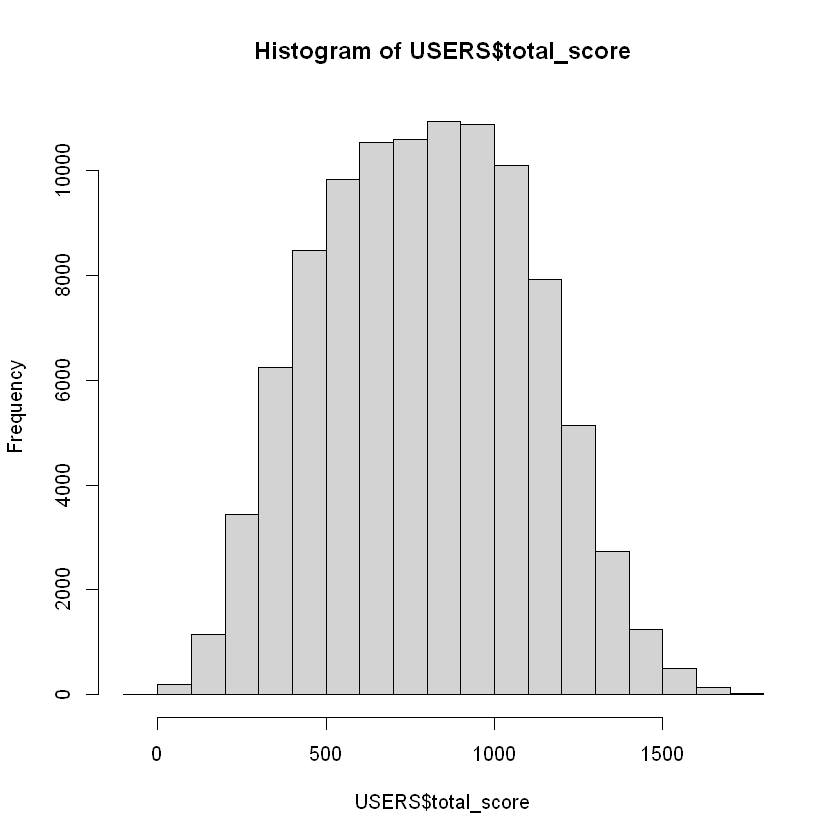

In [10]:
# Unifying baseline and treatment  scores
USERS$total_score=USERS$baseline_score+USERS$treatment_score
summary(USERS$total_score)
hist(USERS$total_score)

In [11]:
#How to assign churn?
#Assume that 15% of customer churn
threshold_churn=quantile(USERS$baseline_score, prob=c(.15))
USERS[,resub:=ifelse(total_score>threshold_churn,1,0)] 
summary(USERS$resub)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.9003  1.0000  1.0000 

In [12]:
USERS

u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub,u_occupation,baseline_score,treated,treatment_score,total_score,resub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,2,2,0.40,1,4,3.05,0,4,769.693,1,251.14148,1020.8345,1
2,2,3,1,0.38,1,4,2.01,1,3,425.093,0,0.00000,425.0930,1
3,2,2,6,0.31,2,5,0.47,0,3,848.993,0,0.00000,848.9930,1
4,1,4,6,0.09,2,3,0.43,0,4,818.393,1,149.06428,967.4573,1
5,2,3,0,0.33,1,3,0.69,0,2,212.593,1,19.37872,231.9717,0
6,2,3,7,0.06,1,3,3.79,0,3,1137.493,1,42.37630,1179.8693,1
7,1,3,6,0.82,2,5,0.32,0,4,907.793,0,0.00000,907.7930,1
8,1,3,6,0.16,1,5,2.76,0,2,983.993,1,72.06029,1056.0533,1
9,2,2,1,0.84,1,7,4.41,1,2,584.893,0,0.00000,584.8930,1


In [13]:
# Adding additional noise by allowing an erratic behavior of 5% of customer 
set.seed(10)
perc_err=num_users*0.05
USERS[sample(USERS$u_id,perc_err),resub:=ifelse(resub==0,1,0)]

USERS


u_id,u_gender,u_age,u_weekly_utilisation,u_sub_utilisation,u_format_pref,u_genre_pref,u_rating_given,u_other_sub,u_occupation,baseline_score,treated,treatment_score,total_score,resub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,2,2,0.40,1,4,3.05,0,4,769.693,1,251.14148,1020.8345,1
2,2,3,1,0.38,1,4,2.01,1,3,425.093,0,0.00000,425.0930,1
3,2,2,6,0.31,2,5,0.47,0,3,848.993,0,0.00000,848.9930,1
4,1,4,6,0.09,2,3,0.43,0,4,818.393,1,149.06428,967.4573,1
5,2,3,0,0.33,1,3,0.69,0,2,212.593,1,19.37872,231.9717,0
6,2,3,7,0.06,1,3,3.79,0,3,1137.493,1,42.37630,1179.8693,1
7,1,3,6,0.82,2,5,0.32,0,4,907.793,0,0.00000,907.7930,1
8,1,3,6,0.16,1,5,2.76,0,2,983.993,1,72.06029,1056.0533,1
9,2,2,1,0.84,1,7,4.41,1,2,584.893,0,0.00000,584.8930,1


In [14]:
# Scaling scores
# USERS$score_scaled <- scale(USERS$score)  #scaling the scores
# USERS[,churn:=ifelse(score>0,0,1)] #if positive score, the user doesn't churn (0), otherwise they churn (1)
# to create some error in the dataset, for some random ids switch btw 0 and 1
# seed(10)
# USERS[sample(USERS$u_id,100),churn:=ifelse(churn==1,0,1)]

In [15]:
data = USERS %>% select(-baseline_score, -treatment_score, -total_score) %>% rename(y=resub, treat=treated)
data=as.data.frame(data)

In [16]:
# Converting categorical variables into factors
data = data %>%
  mutate_at(vars(u_gender, u_format_pref, u_genre_pref, u_other_sub, u_occupation),
            funs(factor))

# We also perform one hot encoding, to be used in models which do not support factors

data_cat= data %>% select(u_gender, u_format_pref, u_genre_pref, u_other_sub, u_occupation)
data_noncat= data %>% select(-u_gender, -u_format_pref, -u_genre_pref, -u_other_sub, -u_occupation, -u_id)
data_oh = one_hot(as.data.table(data_cat))
data_oh=cbind(data$u_id, data_oh, data_noncat)
colnames(data_oh)[1]='u_id'
data_oh$y=as.factor(data_oh$y)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [17]:
# Dividing our Dataset in Three parts: Training, Test and Holdout

#holdout_data_id = sample(seq_len(nrow(data)), size = num_users*0.20)
#working_data = data[-holdout_data_id, ]
#holdout_data = data[holdout_data_id, ]
#split = SplitUplift(holdout_data, 0.6, c("treat", "y"))
set.seed(10)
split = SplitUplift(data, 0.6, c("treat", "y"))
train=split[[1]]
test=split[[2]]

# Reproducing the sample split on the hot encoded dataset
set.seed(10)
split_oh = SplitUplift(data_oh, 0.6, c("treat", "y"))
train_oh=as.data.frame(split_oh[[1]])
test_oh=as.data.frame(split_oh[[2]])

# Define the set of covariates (without y and treat)
features=colnames(train)[2:(length(colnames(train))-2)]
features_oh=colnames(train_oh)[2:(length(colnames(train_oh))-2)]


# Exploratory Data Analysis

- Exploring the distributions of our features
- Look at the differences in treatment effects across various "univariete" subgroups (for example ages, occupation) in order to have a preliminary idea of the extent of possible heterogenity.
- Look at the correlation matrix

# Traditional A/B Testing

In questa sezione potremmo sviluppare l'analisi dei risultati del semplice A/B test, per identificare l'Average Treatment Effect.

# Uplift Models

## Two-Models

### Intuition

In [18]:
# First of all, we create a copy of data,train and test set exclusively for two-models
data_tm=data
train_tm=train
test_tm=test

#We then separate treated and control in both groups
train_tm_control=subset(train_tm, treat==0)
train_tm_treatment=subset(train_tm, treat==1)
test_tm_control = subset(test_tm, treat==0)
test_tm_treatment = subset(test_tm, treat==1)

# Intuition
# logit_model_C<-glm(y ~ u_weekly_utilisation + u_rating_given + u_gender, family= binomial(link=logit), data=train_tm_control)  
# logit_model_T<-glm(y ~ u_weekly_utilisation + u_rating_given + u_gender, family= binomial(link=logit),  data=train_tm_treatment)
# data_tm$pred_C= logit_model_C %>% predict(data_tm, type = "response")
# data_tm$pred_T= logit_model_T %>% predict(data_tm, type = "response")
# data_tm$tau=data_tm$pred_T-data_tm$pred_C
# print('Estimated Probabilities when Customers are not treated')
# plot_ly(x=data_tm$u_weekly_utilisation, y=data_tm$u_rating_given, z=data_tm$pred_C,  type="scatter3d", mode="markers")
# print('Estimated Probabilities when Customers are treated')
# plot_ly(x=data_tm$u_weekly_utilisation, y=data_tm$u_rating_given, z=data_tm$pred_T,  type="scatter3d", mode="markers")
# print('Estimated TE computed as the difference between the abovementioned probs')
# plot_ly(x=data_tm$u_weekly_utilisation, y=data_tm$u_rating_given, z=data_tm$tau,  type="scatter3d", mode="markers")

### Two-Model: Logit

In [19]:
# Defining the formula for the model
logitformula=as.formula(paste("y~", paste(features, collapse="+")))

logit_model_C<-glm(logitformula, family= binomial(link=logit), data=train_tm_control)
logit_model_T<-glm(logitformula, family= binomial(link=logit), data=train_tm_treatment)


# Computing the propability of resub for individuals on both the 
# the train and the test set

train_tm$pred_C= logit_model_C %>% predict(train_tm, type = "response")
train_tm$pred_T= logit_model_T %>% predict(train_tm, type = "response")

#computing the difference between these probabilities (tau): it is the estimated individual treatment effect 
train_tm$tau= train_tm$pred_T - train_tm$pred_C


test_tm$pred_C= logit_model_C %>% predict(test_tm, type = "response")
test_tm$pred_T= logit_model_T %>% predict(test_tm, type = "response")
test_tm$tau= test_tm$pred_T - test_tm$pred_C


      Targeted Population (%) Incremental Uplift (%) Observed Uplift (%)
 [1,]                     0.1               6.126173         57.65277950
 [2,]                     0.2               9.669139         37.24125619
 [3,]                     0.3              10.036062          4.09055920
 [4,]                     0.4              10.128185          0.05068424
 [5,]                     0.5              10.111556          0.00000000
 [6,]                     0.6              10.164670          0.00000000
 [7,]                     0.7              10.045130          0.00000000
 [8,]                     0.8              10.064818          0.00000000
 [9,]                     0.9              10.038281          0.00000000
[10,]                     1.0               9.986970          0.00000000
attr(,"class")
[1] "print.PerformanceUplift"

[1] 0.8164966

[1] 4.099667

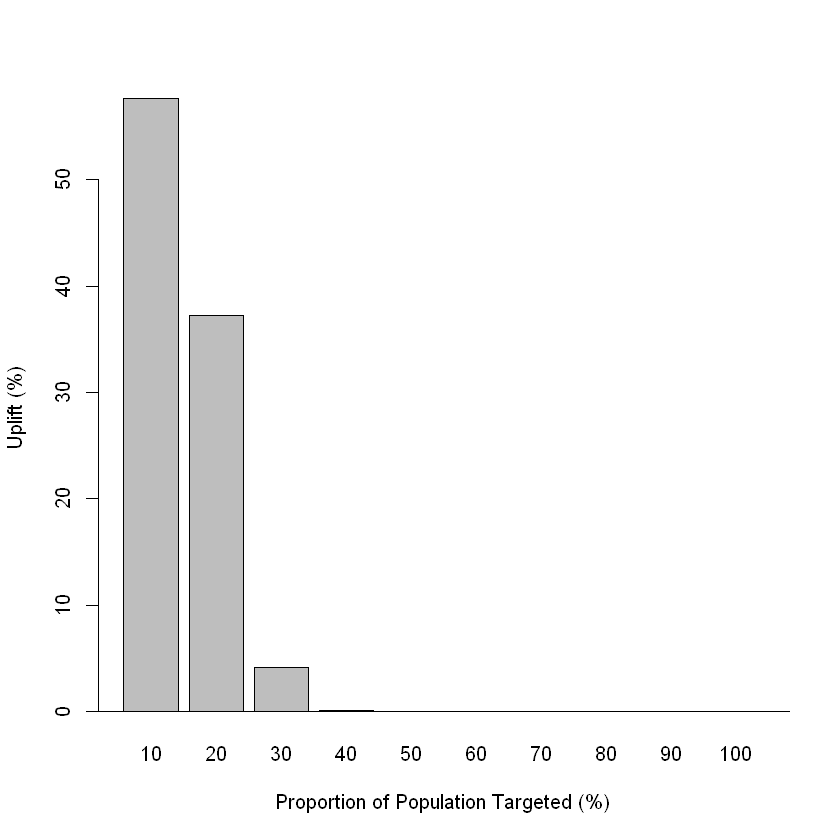

In [20]:
# Model Evaluation on the test set

perf_tm=PerformanceUplift(data = test_tm, treat = "treat",
                          outcome = "y", prediction = "tau", equal.intervals = TRUE, nb.group = 10)

perf_tm
barplot.PerformanceUplift(perf_tm)

QiniArea(perf_tm)

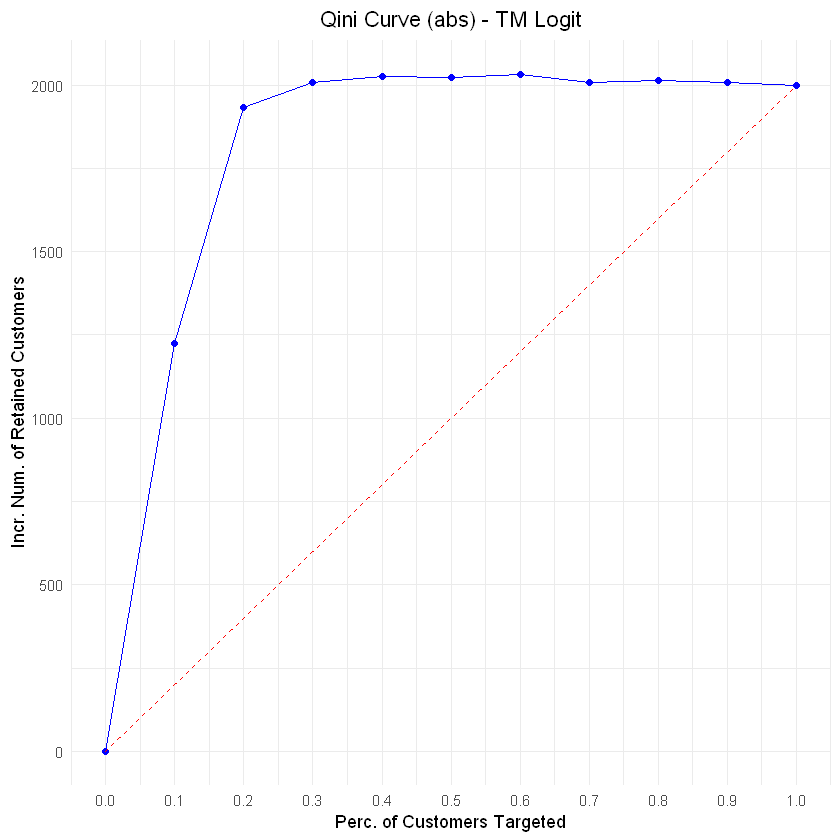

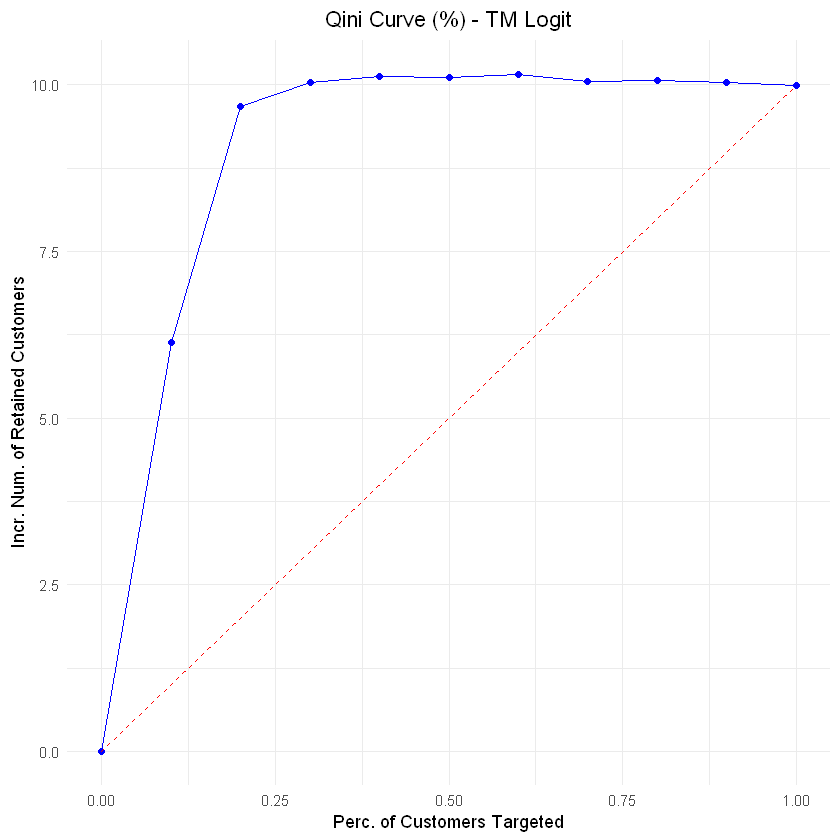

In [21]:
# Plotting Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

df=data.frame(matrix(nrow=10, ncol=3))
df[,1]=perf_tm[[1]]
df[,2]=round(perf_tm[[6]],2)
df[,3]=round(perf_tm[[7]],2)
colnames(df)=c("Dec", "num.incr", "perc.incr")
firstrow=numeric(3)
df=rbind(firstrow,df)


##Plot Qini curves
qini_curve1<-ggplot(df, aes(x=Dec, y=num.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (abs) - TM Logit", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  scale_x_continuous(breaks=seq(0, 1, 0.1))+geom_segment(x = 0, y=0, xend=1, yend=df[11,2], color="red", 
                                                         linetype="dashed", size=0.5)
qini_curve1

qini_curve2<-ggplot(df, aes(x=Dec, y=perc.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (%) - TM Logit", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  xlim(0, 1)+geom_segment(x = 0, y=0, xend=1, yend=df[11,3], color="red", 
                          linetype="dashed", size=0.5)
qini_curve2

#### Improving the model through model selection

      Targeted Population (%) Incremental Uplift (%) Observed Uplift (%)
 [1,]                     0.1               6.126173         57.65277950
 [2,]                     0.2               9.669139         37.24125619
 [3,]                     0.3              10.036062          4.09055920
 [4,]                     0.4              10.128185          0.05068424
 [5,]                     0.5              10.111556          0.00000000
 [6,]                     0.6              10.164670          0.00000000
 [7,]                     0.7              10.045130          0.00000000
 [8,]                     0.8              10.064818          0.00000000
 [9,]                     0.9              10.038281          0.00000000
[10,]                     1.0               9.986970          0.00000000
attr(,"class")
[1] "print.PerformanceUplift"

[1] 0.8164966

[1] 4.099667

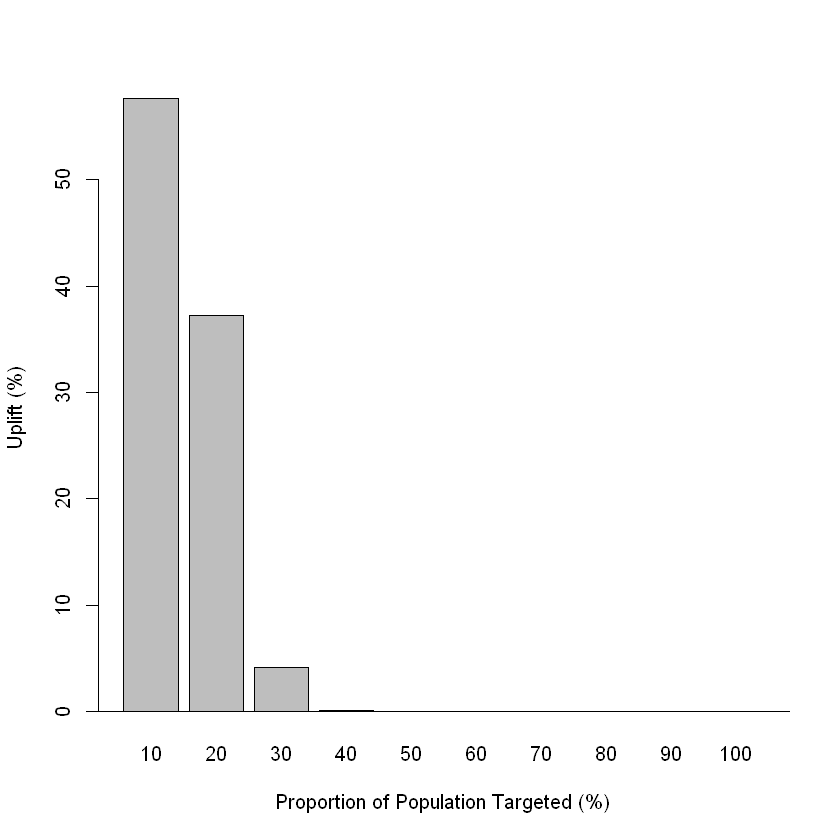

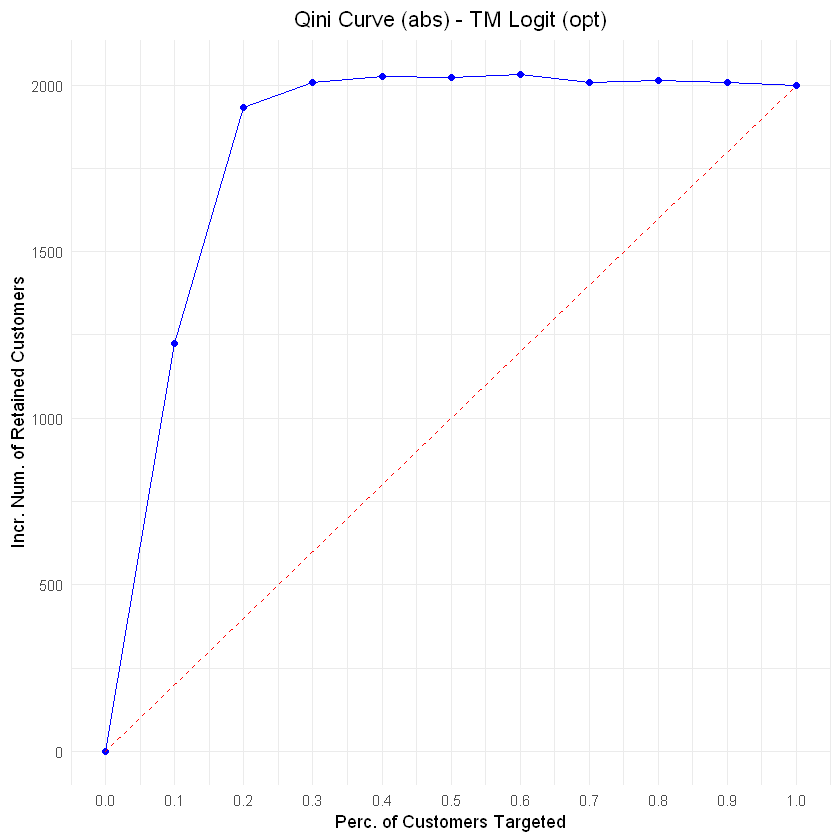

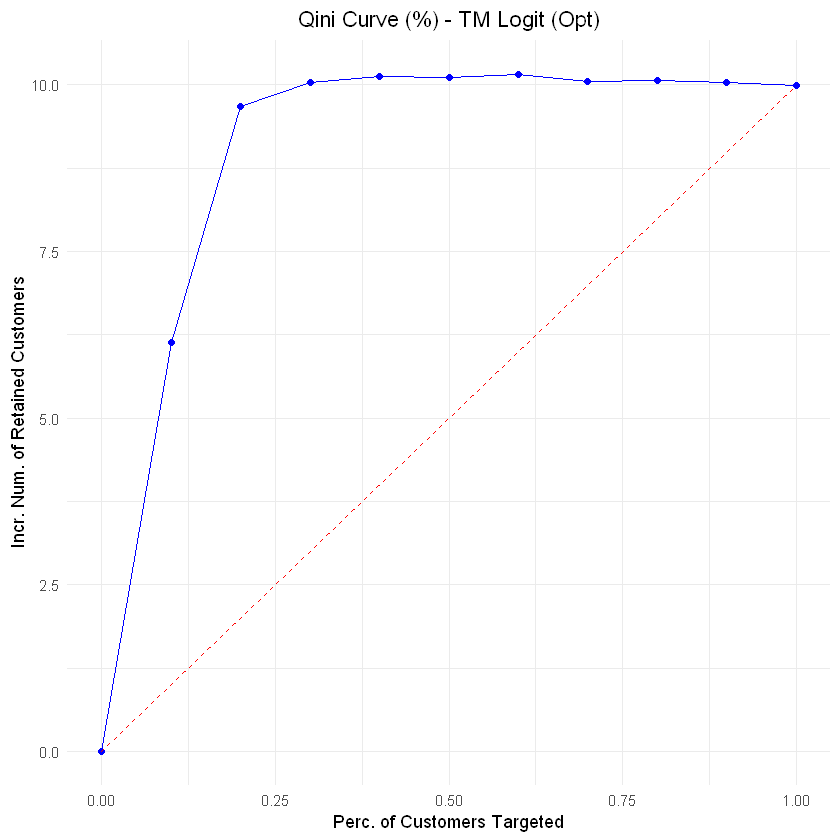

In [22]:
#### 2.1.2 Model selection ####


# Here there are two options: implementing model selection as one would do
# for binary classification, considering model as separated and using the
# the best single models possible; or implementing model selection by 
# so as to maximize the Qini area.



#Once the two models have been estimated, let's derive once gain the 
# estimated treatment effects 




# Evaluating Performance, Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

perf_tm_final=PerformanceUplift(data = test_tm, treat = "treat",
                                outcome = "y", prediction = "tau", equal.intervals = TRUE, nb.group = 10)

perf_tm_final
barplot.PerformanceUplift(perf_tm_final)

QiniArea(perf_tm_final) 

# Plotting Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

df=data.frame(matrix(nrow=10, ncol=3))
df[,1]=perf_tm_final[[1]]
df[,2]=round(perf_tm_final[[6]],2)
df[,3]=round(perf_tm_final[[7]],2)
colnames(df)=c("Dec", "num.incr", "perc.incr")
firstrow=numeric(3)
df=rbind(firstrow,df)


##Plot Qini curves
qini_curve1<-ggplot(df, aes(x=Dec, y=num.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (abs) - TM Logit (opt)", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  scale_x_continuous(breaks=seq(0, 1, 0.1))+geom_segment(x = 0, y=0, xend=1, yend=df[11,2], color="red", 
                                                         linetype="dashed", size=0.5)
qini_curve1

qini_curve2<-ggplot(df, aes(x=Dec, y=perc.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (%) - TM Logit (Opt)", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  xlim(0, 1)+geom_segment(x = 0, y=0, xend=1, yend=df[11,3], color="red", 
                          linetype="dashed", size=0.5)
qini_curve2


### XGBoost
Source: https://humboldt-wi.github.io/blog/research/applied_predictive_modeling_19/social_pressure/

[Tune] Started tuning learner classif.xgboost for parameter set:

             Type len Def     Constr Req Tunable Trafo
nrounds   integer   -   - 100 to 500   -    TRUE     -
max_depth integer   -   -    1 to 10   -    TRUE     -
eta       numeric   -   - 0.1 to 0.5   -    TRUE     -
lambda    numeric   -   -    -1 to 0   -    TRUE     Y

With control class: TuneControlRandom

Imputation value: 1

[Tune-x] 1: nrounds=165; max_depth=5; eta=0.126; lambda=0.108

[Tune-y] 1: mmce.test.mean=0.1264500; time: 0.3 min

[Tune-x] 2: nrounds=135; max_depth=1; eta=0.103; lambda=0.401

[Tune-y] 2: mmce.test.mean=0.1365667; time: 0.1 min

[Tune-x] 3: nrounds=181; max_depth=4; eta=0.176; lambda=0.201

[Tune-y] 3: mmce.test.mean=0.1271500; time: 0.3 min

[Tune-x] 4: nrounds=308; max_depth=7; eta=0.236; lambda=0.115

[Tune-y] 4: mmce.test.mean=0.1312667; time: 0.8 min

[Tune-x] 5: nrounds=325; max_depth=5; eta=0.499; lambda=0.675

[Tune-y] 5: mmce.test.mean=0.1360667; time: 0.6 min

[Tune] Result: nro

      Targeted Population (%) Incremental Uplift (%) Observed Uplift (%)
 [1,]                     0.1               4.401325          46.2543641
 [2,]                     0.2               6.709495          15.5597789
 [3,]                     0.3               7.300102           2.6841312
 [4,]                     0.4               7.633289           1.2506503
 [5,]                     0.5               7.966708           1.5166835
 [6,]                     0.6               8.149320           1.3399816
 [7,]                     0.7               8.291721           0.8982036
 [8,]                     0.8               8.490802           1.2121212
 [9,]                     0.9               8.883956           3.3406918
[10,]                     1.0               9.986970           9.8485544
attr(,"class")
[1] "print.PerformanceUplift"

[1] 0.2888889

[1] 2.323249

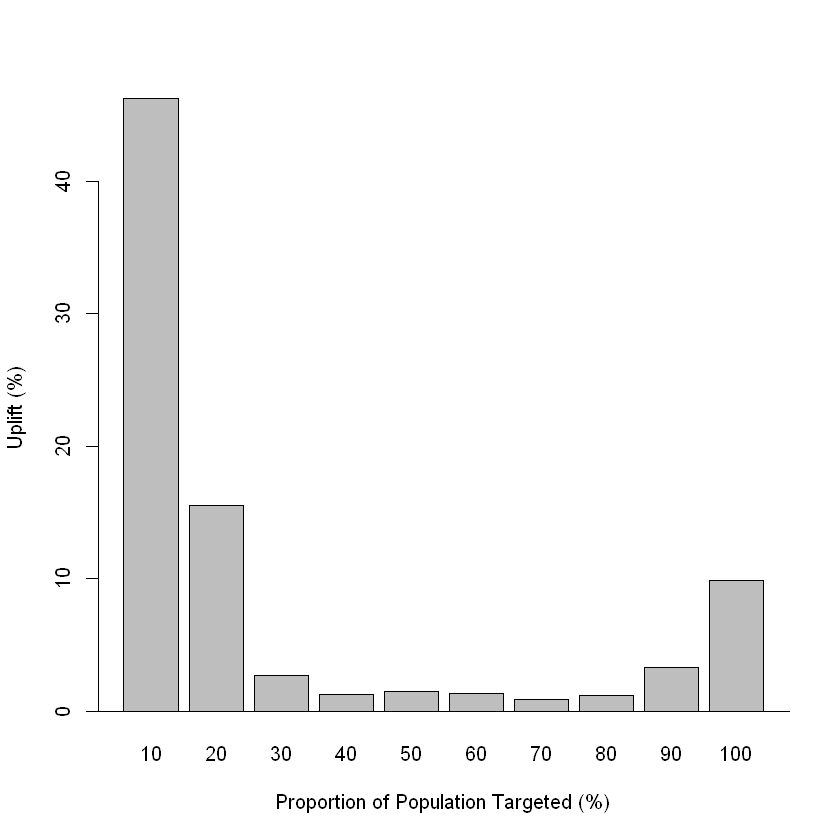

In [23]:
# Let's experiment with a more complex Classifier: XGBoost -- codice preso online

#Setting Up the xgboost learner

xgb_learner <- makeLearner("classif.xgboost", predict.type = "prob", par.vals = list(
  objective = "binary:logistic", eval_metric = "error"))


xgb_params <- makeParamSet(
  makeIntegerParam("nrounds", lower = 100, upper = 500), makeIntegerParam("max_depth", lower = 1, upper = 10),
  makeNumericParam("eta", lower = .1, upper = .5), makeNumericParam("lambda", lower = -1, upper = 0, trafo = function(x) 10^x))
ctrl <- makeTuneControlRandom(maxit = 5)  #nel codice era 15, ma per ora ho diminuito per far prima
resample_desc <- makeResampleDesc("CV", iters = 4)


#creating the model for treatment group:
task<-makeClassifTask(data=train_oh[ ,!(colnames(train_oh) == "treat")], target="y")
tuned_params <- tuneParams(learner = xgb_learner,task = task, resampling = resample_desc,
                           par.set = xgb_params,control = ctrl)
treatment_xgbmodel<- mlr::train(learner = setHyperPars(learner = xgb_learner,par.vals = tuned_params$x),task = task)

#creating the model for control group:
task<-makeClassifTask(data=test_oh[ ,!(colnames(test_oh) == "treat")],target="y")
tuned_params <- tuneParams(learner = xgb_learner,task = task,resampling = resample_desc,
                           par.set = xgb_params,control = ctrl)
control_xgbmodel<- mlr::train(learner = setHyperPars(learner = xgb_learner,par.vals = tuned_params$x),task = task)

#making treatment effect estimates on train and test data:
train_tm$pred_T_xgb<-predict(treatment_xgbmodel, newdata=train_oh[ ,!(colnames(train_oh) == "treat")])$data[[2]]
train_tm$pred_C_xgb<-predict(control_xgbmodel, newdata=train_oh[ ,!(colnames(train_oh) == "treat")])$data[[2]]
train_tm$tau_xgb<-train_tm$pred_T_xgb-train_tm$pred_C_xgb

test_tm$pred_T_xgb<-predict(treatment_xgbmodel,newdata=test_oh[ ,!(colnames(test_oh) == "treat")])$data[[2]]
test_tm$pred_C_xgb<-predict(control_xgbmodel,newdata=test_oh[ ,!(colnames(test_oh) == "treat")])$data[[2]]
test_tm$tau_xgb<-test_tm$pred_T_xgb-test_tm$pred_C_xgb

#Evaluating Performance

perf_xgb=PerformanceUplift(data = test_tm, treat = "treat",
                          outcome = "y", prediction = "tau_xgb", equal.intervals = TRUE, nb.group = 10)

perf_xgb
barplot.PerformanceUplift(perf_xgb)

QiniArea(perf_xgb) 

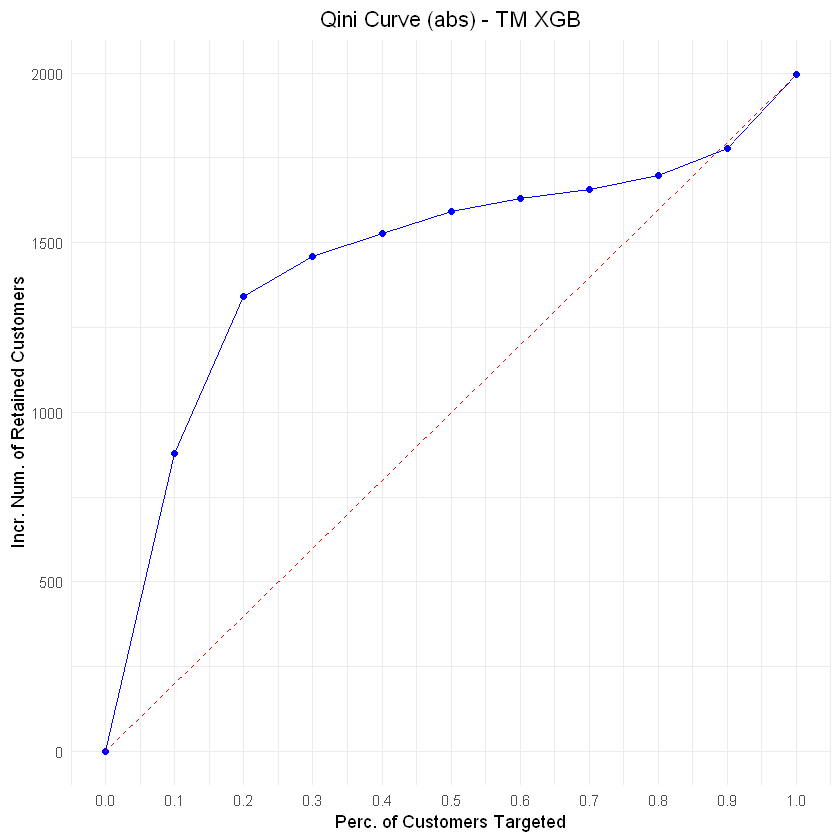

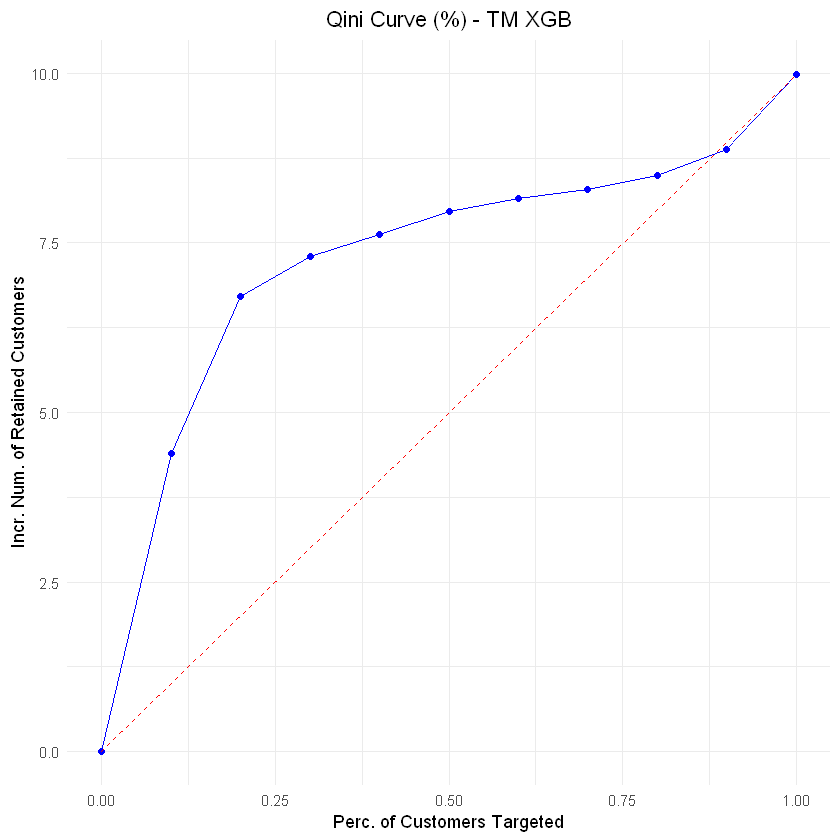

In [24]:
# Plotting Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

df=data.frame(matrix(nrow=10, ncol=3))
df[,1]=perf_xgb[[1]]
df[,2]=round(perf_xgb[[6]],2)
df[,3]=round(perf_xgb[[7]],2)
colnames(df)=c("Dec", "num.incr", "perc.incr")
firstrow=numeric(3)
df=rbind(firstrow,df)

##Plot Qini curves
qini_curve1<-ggplot(df, aes(x=Dec, y=num.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (abs) - TM XGB", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  scale_x_continuous(breaks=seq(0, 1, 0.1))+geom_segment(x = 0, y=0, xend=1, yend=df[11,2], color="red", 
                                                         linetype="dashed", size=0.5)
qini_curve1

qini_curve2<-ggplot(df, aes(x=Dec, y=perc.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve (%) - TM XGB", y="Incr. Num. of Retained Customers", x="Perc. of Customers Targeted")+
  xlim(0, 1)+geom_segment(x = 0, y=0, xend=1, yend=df[11,3], color="red", 
                          linetype="dashed", size=0.5)
qini_curve2

## Single Model with Interactions

### Intuition

In [25]:
# Intuition
# logit_model_inter<-glm(y ~ u_weekly_utilisation + u_rating_given + treat + u_weekly_utilisation*treat + u_rating_given*treat , family= binomial(link=logit), data=data)
# data_interaction=data
# data_interaction$pred= logit_model_inter %>% predict(data_interaction, type = "response")
# print('Estimated Probabilities')
# plot_ly(x=data_interaction$u_weekly_utilisation, y=data_interaction$u_rating_given, z=data_interaction$pred,  type="scatter3d", mode="markers", color=data_interaction$treat)
# print('Estimated Probabilities for treated and non treated customers')

### Basic Model

In [26]:
### 3.1 Basic Single Model ####

#Creating a copy of the train and test sets
train_interuplift=train
test_interuplift=test

#Estimating the model
intermodel<-InterUplift(train, treat='treat', outcome='y', predictors=features, input = "all")

print(intermodel)
summary(intermodel)




Call:  InterUplift(data = train, treat = "treat", outcome = "y", predictors = features, 
    input = "all")

Coefficients:
               (Intercept)                       treat  
                  0.272898                    1.373958  
                 u_gender2                       u_age  
                  0.015169                   -0.133078  
      u_weekly_utilisation           u_sub_utilisation  
                  0.578915                    0.859479  
            u_format_pref2              u_format_pref3  
                 -0.695017                   -0.779524  
             u_genre_pref2               u_genre_pref3  
                 -0.614695                   -0.495697  
             u_genre_pref4               u_genre_pref5  
                 -0.002982                   -0.559332  
             u_genre_pref6               u_genre_pref7  
                 -0.559085                   -0.582062  
            u_rating_given                u_other_sub1  
                  0.3


Call:
InterUplift(data = train, treat = "treat", outcome = "y", predictors = features, 
    input = "all")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5502   0.2373   0.4045   0.5885   2.0670  

Coefficients:
                            Estimate Std. Error z value             Pr(>|z|)
(Intercept)                 0.272898   0.091033   2.998             0.002719
treat                       1.373958   0.137915   9.962 < 0.0000000000000002
u_gender2                   0.015169   0.033610   0.451             0.651751
u_age                      -0.133078   0.019042  -6.989   0.0000000000027757
u_weekly_utilisation        0.578915   0.009071  63.823 < 0.0000000000000002
u_sub_utilisation           0.859479   0.057792  14.872 < 0.0000000000000002
u_format_pref2             -0.695017   0.035233 -19.726 < 0.0000000000000002
u_format_pref3             -0.779524   0.055000 -14.173 < 0.0000000000000002
u_genre_pref2              -0.614695   0.063459  -9.687 < 0.0000000000

      Targeted Population (%) Incremental Uplift (%) Observed Uplift (%)
 [1,]                     0.1               5.219424         48.89500138
 [2,]                     0.2               8.126014         29.25379543
 [3,]                     0.3               8.370911          2.94559490
 [4,]                     0.4               8.214226         -0.12463092
 [5,]                     0.5               8.284826          0.46930239
 [6,]                     0.6               8.350635          0.02466575
 [7,]                     0.7               8.187759          0.07101021
 [8,]                     0.8               8.036696         -1.07107660
 [9,]                     0.9               8.036657         -0.84510589
[10,]                     1.0               7.934585         -0.37228254
attr(,"class")
[1] "print.PerformanceUplift"

[1] 0.6888889

[1] 3.473999

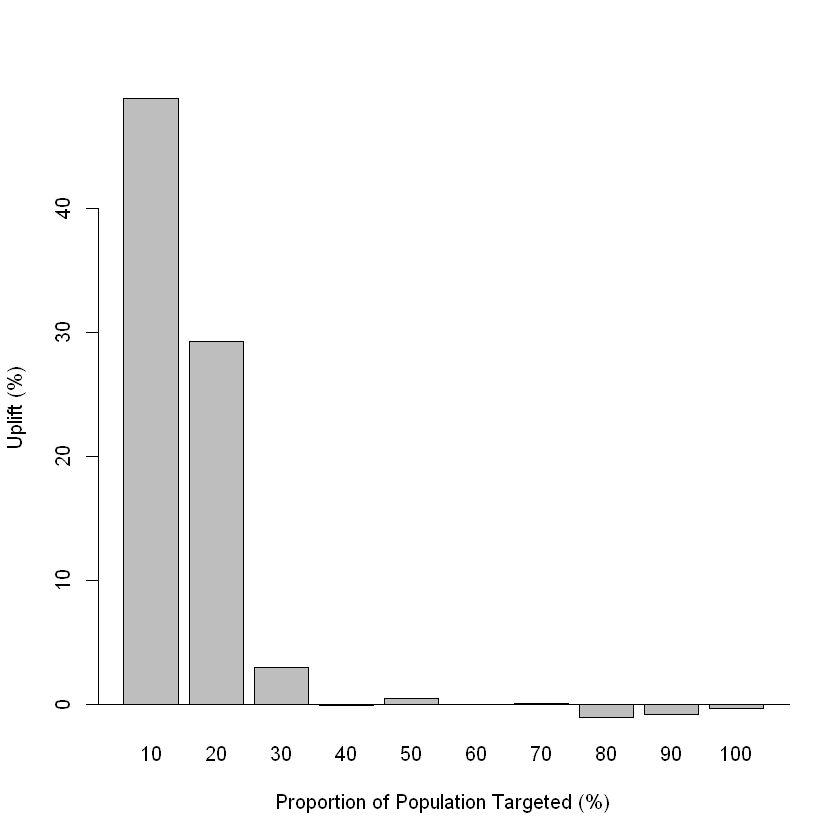

In [27]:
#Extracting predictions for train data
pred_intermodel= predict(intermodel, train_interuplift, treat='treat')
train_interuplift$pred_intermodel=pred_intermodel

#Eveluating the model performance
perf_intermodel=PerformanceUplift(data = train_interuplift, treat = "treat",
                                  outcome = "y", prediction = "pred_intermodel", equal.intervals = TRUE, nb.group = 10)


perf_intermodel
barplot.PerformanceUplift(perf_intermodel)

QiniArea(perf_intermodel) 

      Targeted Population (%) Incremental Uplift (%) Observed Uplift (%)
 [1,]                     0.1               6.126173         57.65277950
 [2,]                     0.2               9.669139         37.24125619
 [3,]                     0.3              10.036062          4.09055920
 [4,]                     0.4              10.128185          0.05068424
 [5,]                     0.5              10.111556          0.00000000
 [6,]                     0.6              10.164670          0.00000000
 [7,]                     0.7              10.045130          0.00000000
 [8,]                     0.8              10.064818          0.00000000
 [9,]                     0.9              10.038281          0.00000000
[10,]                     1.0               9.986970          0.00000000
attr(,"class")
[1] "print.PerformanceUplift"

[1] 0.8164966

[1] 4.099667

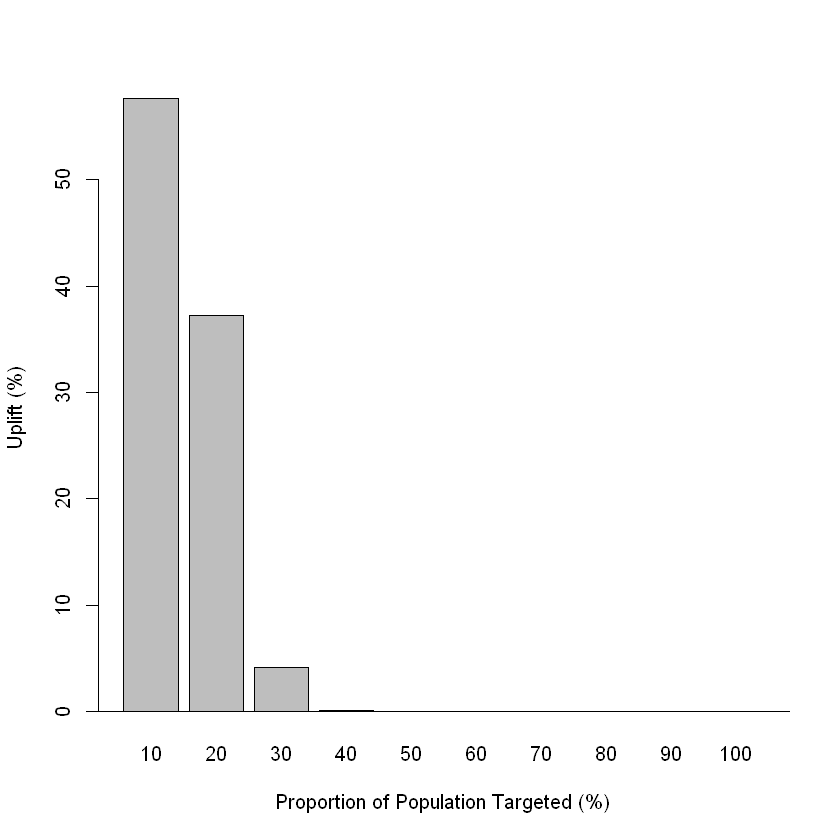

In [28]:
# Test set

#Extracting predictions for test  data
pred_intermodel_test= predict(intermodel, test_interuplift, treat='treat')
test_interuplift$pred_intermodel=pred_intermodel_test

#Eveluating the model performance on the test set
perf_intermodel=PerformanceUplift(data = test_interuplift, treat = "treat",
                                  outcome = "y", prediction = "pred_intermodel", equal.intervals = TRUE, nb.group = 10)


perf_intermodel
barplot.PerformanceUplift(perf_intermodel)

QiniArea(perf_intermodel) 

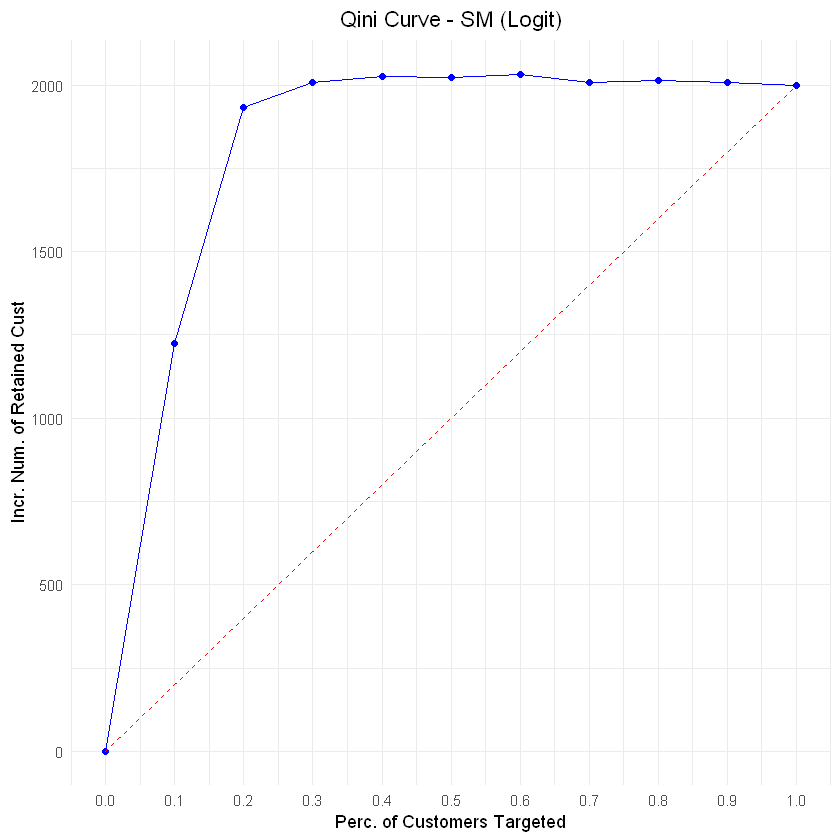

[1] 4.099667

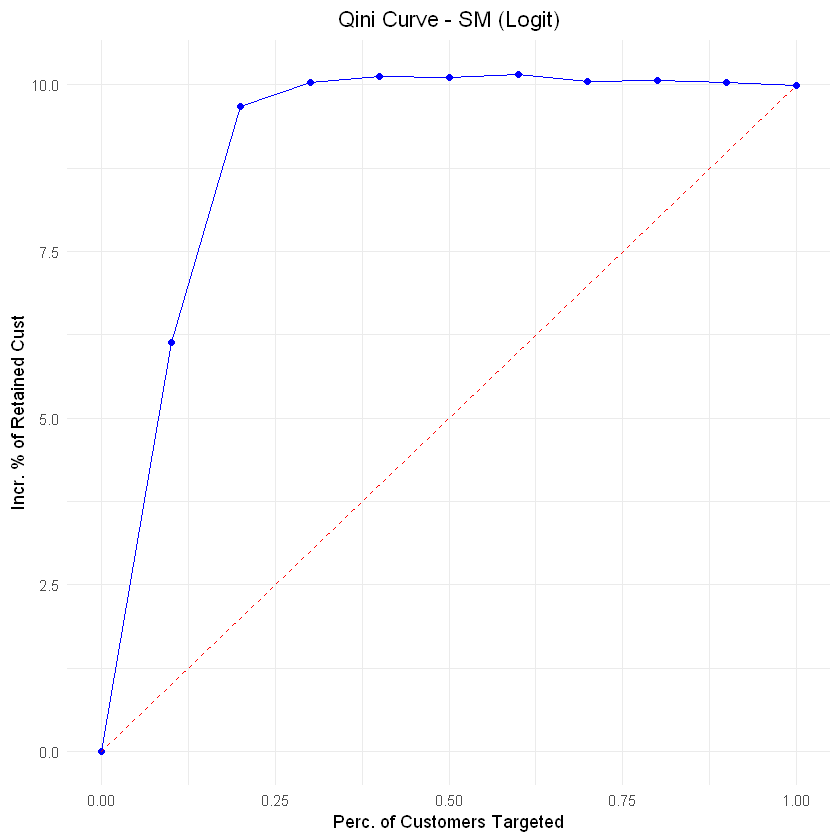

In [29]:
# Plotting Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

df=data.frame(matrix(nrow=10, ncol=3))
df[,1]=perf_intermodel[[1]]
df[,2]=round(perf_intermodel[[6]],2)
df[,3]=round(perf_intermodel[[7]],2)
colnames(df)=c("Dec", "num.incr", "perc.incr")
firstrow=numeric(3)
df=rbind(firstrow,df)


# Plot Qini curves
qini_curve_1<-ggplot(df, aes(x=Dec, y=num.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve - SM (Logit)", y="Incr. Num. of Retained Cust", x="Perc. of Customers Targeted")+
  scale_x_continuous(breaks=seq(0, 1, 0.1))+geom_segment(x = 0, y=0, xend=1, yend=df[11,2], color="red", 
                                                         linetype="dashed", size=0.5)
qini_curve_1


qini_curve_2<-ggplot(df, aes(x=Dec, y=perc.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve - SM (Logit)", y="Incr. % of Retained Cust", x="Perc. of Customers Targeted")+
  xlim(0, 1)+geom_segment(x = 0, y=0, xend=1, yend=df[11,3], color="red", 
               linetype="dashed", size=0.5)
qini_curve_2

# Qini area

QiniArea(perf_intermodel) 

### Model Selection

In [31]:
## 3.2 Model selection ####


# Understanding the function LassoPath
# formula=intermodel[[23]]
# my_path=LassoPath(train_interuplift, formula)
# my_path_mod=LassoPath_mod(train_interuplift, formula)

#Finding the optimal set of features
# La funzione BestFeatures() non funziona con variabili categoriche inserite come fattori, e dunque vanno messe one hot encoded come per l'xgb
# Penso che per il momento la funzione non metta una categoria come baseline e dunque sputa il set di warnings che si vedono sotto (relativi alla multicollinearità delle featuers)
# Capire come può essere risolta questa cosa (provare a rimuovere una categoria per ogni variabili dela dataset oh, oppure modificare il source code della funzione affinché lavori con variabili
# categoriche fattorizzate).

inter_opt_feat=BestFeatures(data=data_oh, treat='treat', outcome='y', predictors=features_oh, rank.precision = 2, 
             equal.intervals = FALSE, nb.group = 10, 
             validation = TRUE, p = 0.4)

# La funzione BestFeatures va a trovare un set di features ottimo per il modello, utilizzando
# la cross validation (semplce train vs test) e considerando il Qini coeff. Unico problema è che parte dall'intero dataset ed utilizza 
# train e test set creati da zero (fa nuovamente lo split internamente). Noi abbiamo bisogno che utilizzi
# il train e il test set che abbiamo già creato e utilizzato negli altri modelli.
# Bisogna dunque modificare la funzione affinché lavori in questo modo.

# Writing the corresponding formula for the model
formula_final_inter=as.formula(paste("y~", paste(inter_opt_feat, collapse="+")))



Warning message in PerformanceUplift(valid, treat, outcome, "lambda.pred", rank.precision = rank.precision, :
"The number of unique predictions will be used as the number of groups"
Warning message in PerformanceUplift(valid, treat, outcome, "lambda.pred", rank.precision = rank.precision, :
"The number of unique predictions will be used as the number of groups"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale

In [32]:
###INTERUPLIFT FORMULA: una versione leggermente modificata della funzione InterUplift()
# che permette di stimare un modello partendo da una formula prespecificata dall'utente

InterUplift.formula <- function(formula, treat, data, ...){
  
  # Formula interface to InterUplift.
  if (!inherits(formula, "formula"))
    stop("Method is only for formula objects")
  
  mf <- match.call(expand.dots = FALSE)
  args <- match(c("formula", "data"), names(mf), 0)
  mf <- mf[c(1, args)]
  mf$drop.unused.levels <- TRUE
  mf[[1]] <- as.name("model.frame")
  mf <- eval.parent(mf)
  
  Terms <- attr(mf, "terms")
  Terms <- names(attr(Terms,"dataClasses")) 
  
  if (length(intersect(treat,colnames(data))) == 0)
    stop("InterUplift: data does not include the control/treatment variable treat).")    
  
  outcome <- Terms[1]
  predictors <- Terms[-1]
  fit <- InterUplift(data=data, treat=treat, outcome=outcome, predictors=predictors, input = "all", ...)
  
  
  cl <- match.call()
  cl[[1]] <- as.name("InterUplift")
  fit$call <- cl
  
  return(fit)
}

In [34]:
# Train
final_intermodel_train<-InterUplift.formula(formula=formula_final_inter, treat="treat", data=train_oh) 
print(final_intermodel_train)
summary(final_intermodel_train)


pred_intermodel_final= predict(final_intermodel_train, train_interuplift, treat='treat')
train_interuplift$pred_intermodel_final=pred_intermodel_final
perf_intermodel_final=PerformanceUplift(data = train_interuplift, treat = "treat",
                                  outcome = "y", prediction = "pred_intermodel_final", equal.intervals = TRUE, nb.group = 10)

perf_intermodel_final
barplot.PerformanceUplift(perf_intermodel_final)
QiniArea(perf_intermodel_final) 


# Test

final_intermodel_test<-InterUplift.formula(formula=formula_final_inter, treat="treat", data=test_interuplift) 
print(final_intermodel_test)
summary(final_intermodel_test)


pred_intermodel_final= predict(final_intermodel_test, test_interuplift, treat='treat')
test_interuplift$pred_intermodel_final=pred_intermodel_final
perf_intermodel_final=PerformanceUplift(data = test_interuplift, treat = "treat",
                                        outcome = "y", prediction = "pred_intermodel_final", equal.intervals = TRUE, nb.group = 10)
perf_intermodel_final
barplot.PerformanceUplift(perf_intermodel_final)
QiniArea(perf_intermodel_final)


# Holdout - Per ora non lo abbiamo


Call:  InterUplift(formula = formula_final_inter, treat = "treat", data = train_oh)

Coefficients:
               (Intercept)                       treat  
                  -0.73761                     2.35163  
                u_gender_1                  u_gender_2  
                  -0.01517                          NA  
           u_format_pref_2             u_format_pref_3  
                  -0.69502                    -0.77952  
            u_genre_pref_1              u_genre_pref_2  
                   0.58206                    -0.03263  
            u_genre_pref_3              u_genre_pref_4  
                   0.08637                     0.57908  
            u_genre_pref_5              u_genre_pref_6  
                   0.02273                     0.02298  
            u_genre_pref_7               u_other_sub_0  
                        NA                     0.36857  
             u_other_sub_1              u_occupation_1  
                        NA                   


Call:
InterUplift(formula = formula_final_inter, treat = "treat", data = train_oh)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5502   0.2373   0.4045   0.5885   2.0670  

Coefficients: (8 not defined because of singularities)
                            Estimate Std. Error z value             Pr(>|z|)
(Intercept)                -0.737606   0.096069  -7.678   0.0000000000000162
treat                       2.351633   0.142378  16.517 < 0.0000000000000002
u_gender_1                 -0.015169   0.033610  -0.451             0.651751
u_gender_2                        NA         NA      NA                   NA
u_format_pref_2            -0.695017   0.035233 -19.726 < 0.0000000000000002
u_format_pref_3            -0.779524   0.055000 -14.173 < 0.0000000000000002
u_genre_pref_1              0.582062   0.064145   9.074 < 0.0000000000000002
u_genre_pref_2             -0.032633   0.058848  -0.555             0.579218
u_genre_pref_3              0.086366   0.060166   1.4

ERROR: Error in eval(predvars, data, env): oggetto "u_gender_1" non trovato


In [ ]:
# Plotting Qini curve and Qini Coeff on the test set - scrivere funzione che lo faccia 
# in automatico

df=data.frame(matrix(nrow=10, ncol=3))
df[,1]=perf_intermodel_final[[1]]
df[,2]=round(perf_intperf_intermodel_finalermodel[[6]],2)
df[,3]=round(perf_intermodel_final[[7]],2)
colnames(df)=c("Dec", "num.incr", "perc.incr")
firstrow=numeric(3)
df=rbind(firstrow,df)


# Plot Qini curves
qini_curve_1<-ggplot(df, aes(x=Dec, y=num.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve - SM Logit (opt)", y="Incr. Num. of Retained Cust", x="Perc. of Customers Targeted")+
  scale_x_continuous(breaks=seq(0, 1, 0.1))+geom_segment(x = 0, y=0, xend=1, yend=df[11,2], color="red", 
                                                         linetype="dashed", size=0.5)
qini_curve_1


qini_curve_2<-ggplot(df, aes(x=Dec, y=perc.incr))+geom_point(color="blue")+geom_line(color="blue")+
  mytheme+labs(title="Qini Curve - SM (Logit)", y="Incr. % of Retained Cust", x="Perc. of Customers Targeted")+
  xlim(0, 1)+geom_segment(x = 0, y=0, xend=1, yend=df[11,3], color="red", 
               linetype="dashed", size=0.5)
qini_curve_2